# <center>Santander Value Prediction Challenge</center>

# Table of contents:
- <a href='#1'>1. Introduction/ Use Cases</a> 
- <a href='#2'>2. Data description</a>
- <a href='#3'>3. ETL</a> 
    - <a href='#3.1'>3.1 Imported parkages</a> 
    - <a href='#3.2'>3.2 Load Data</a> 
- <a href='#4'>4. Data examination AND transformation</a>   
    - <a href='#4.1'>4.1 Data shape</a>
    - <a href='#4.2'>4.2 Distribution of the Target</a>
    - <a href='#4.3'>4.3 Constant columns</a>
    - <a href='#4.4'>4.4 '0' Sparse</a>
- <a href='#5'>5. Baseline</a>  
    - <a href='#5.1'>5.1 LighGBM regression</a>

***(...be continued)***

-Source: 
- https://www.kaggle.com/c/santander-value-prediction-challenge
- https://www.kaggle.com/tunguz/yaeda-yet-another-eda

# <a id='1'>1. Introduction/ Use Cases</a>
- According to Epsilon research, 80% of customers are more likely to do business with you if you provide personalized service. Banking is no exception. 
- The digitalization of everyday lives means that customers expect services to be delivered in a personalized and timely manner… and often before they´ve even realized they need the service. In their 3rd Kaggle competition, Santander Group aims to go a step beyond recognizing that there is a need to provide a customer a financial service and intends to determine the amount or value of the customer's transaction. This means anticipating customer needs in a more concrete, but also simple and personal way. With so many choices for financial services, this need is greater now than ever before. 
- In this competition, Santander Group is asking Kagglers to help them identify the value of transactions for each potential customer. This is a first step that Santander needs to nail in order to personalize their services at scale.

# <a id='2'>2. Data description</a>
- You are provided with an anonymized dataset containing numeric feature variables, the numeric target column, and a string ID column. The task is to predict the value of target column in the test set.
- File descriptions:
    - train.csv - the training set
    - test.csv - the test set
    - sample_submission.csv - a sample submission file in the correct format

# <a id='3'>3. ETL</a>

## <a id='3.1'>3.1 Imported parkages:</a>

In [1]:
import numpy as np 
import pandas as pd 
import os
import operator
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import describe
%matplotlib inline

## <a id='3.2'>3.2 Load data:</a>

In [2]:
path = r"C:\Khoa\School\Santander Value Prediction Challenge\data/"

In [3]:
train = pd.read_csv(path+'train.csv')
train.head()

,ID,target,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000d6aaf2,38000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
1,000fbd867,600000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
2,0027d6b71,10000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
3,0028cbf45,2000000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0
4,002a68644,14400000.0,0.0,0,0.0,0,0,0,0,0,...,0.0,0.0,0.0,0,0,0,0,0,0,0


# <a id='4'>4. Data examination</a>

## <a id='4.1'>4.1 Data shape:</a>

In [4]:
train.shape

(4459, 4993)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4459 entries, 0 to 4458
Columns: 4993 entries, ID to 9fc776466
dtypes: float64(1845), int64(3147), object(1)
memory usage: 169.9+ MB


In [6]:
train.isnull().values.any()

False

- There are a lot of features! Almost 5000! And they outnumber the number of rows in the training set. There are less than 5000 training rows. In fact, there are fewer rows than columns, which means we'll have to invest a lot of effort into feature selection / feature engineering. 
- Pandas is treating 1845 features as float, and 3147 as integer. It is possible that some of those int features are one-hot-encoded or label-encoded categorical variables.
- There doesn't appear to be any missing values in the train set






In [7]:
test = pd.read_csv(path+'test.csv')
test.head()

,ID,48df886f9,0deb4b6a8,34b15f335,a8cb14b00,2f0771a37,30347e683,d08d1fbe3,6ee66e115,20aa07010,...,3ecc09859,9281abeea,8675bec0b,3a13ed79a,f677d4d13,71b203550,137efaa80,fb36b89d9,7e293fbaf,9fc776466
0,000137c73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,00021489f,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0004d7953,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,00056a333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,00056d8eb,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
test.shape

(49342, 4992)

In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49342 entries, 0 to 49341
Columns: 4992 entries, ID to 9fc776466
dtypes: float64(4991), object(1)
memory usage: 1.8+ GB


In [10]:
test.isnull().values.any()

False

- there are no int values in the test set?! ==> memory usage: 1.8+ GB comparing to 169.9+ MB from train dataset

## <a id='4.2'>4.2 Distribution of the Target:</a>

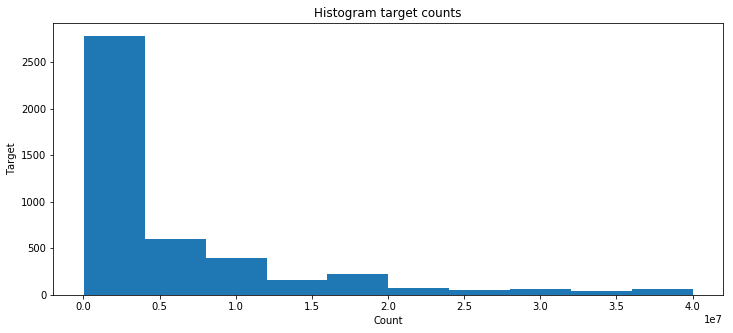

In [11]:
plt.figure(figsize=(12, 5))
plt.hist(train['target'], bins=10)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Target')
plt.show()

- This is a highly skewed distribution ==> try to re-plot it with with log transform of the target.

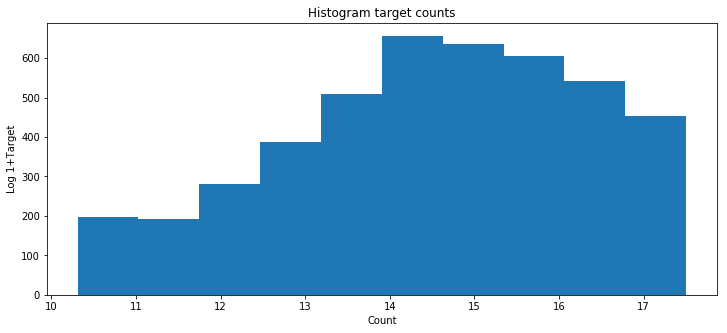

In [12]:
plt.figure(figsize=(12, 5))
plt.hist(np.log(1+train['target']), bins=10)
plt.title('Histogram target counts')
plt.xlabel('Count')
plt.ylabel('Log 1+Target')
plt.show()

- Distribution looks much more normal ==> This is probably one of the main reasons why the metric that we are trying to optimize for this competition is RMSLE - root mean square logarithmic error.

In [13]:
train_log_target = np.log(1+train['target'])
train_log_target.describe()

count    4459.000000
mean       14.490239
std         1.750947
min        10.308986
25%        13.304687
50%        14.630876
75%        15.894952
max        17.504390
Name: target, dtype: float64

In [14]:
train['target'].describe()

count    4.459000e+03
mean     5.944923e+06
std      8.234312e+06
min      3.000000e+04
25%      6.000000e+05
50%      2.260000e+06
75%      8.000000e+06
max      4.000000e+07
Name: target, dtype: float64

- Stats for Log(1+Target) distribution are much more amenable

## <a id='4.3'>4.3 Constant columns:</a>

In [15]:
constant_train = train.loc[:, (train == train.iloc[0]).all()].columns.tolist()
constant_test = test.loc[:, (test == test.iloc[0]).all()].columns.tolist()
print('Number of constant columns in the train set:', len(constant_train))
print('Number of constant columns in the test set:', len(constant_test))

Number of constant columns in the train set: 256
Number of constant columns in the test set: 0


- There are 256 constant columns in the train set, but none in the test set. 
- The constant columns would not yield any useful information ==> Remove them

In [16]:
columns_to_use = test.columns.tolist()
del columns_to_use[0] # Remove 'ID'
columns_to_use = [x for x in columns_to_use if x not in constant_train] #Remove all 0 columns
len(columns_to_use)

4735

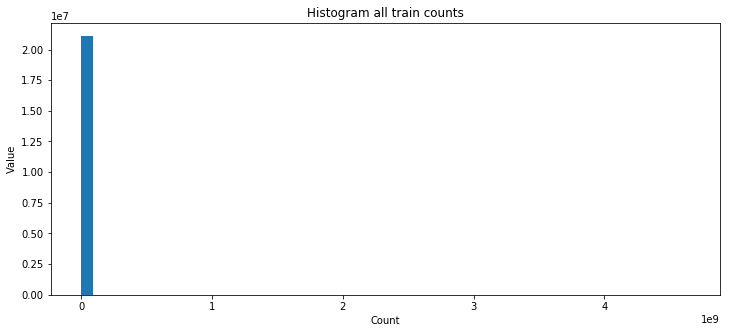

In [17]:
plt.figure(figsize=(12, 5))
plt.hist(train[columns_to_use].values.flatten(), bins=50)
plt.title('Histogram all train counts')
plt.xlabel('Count')
plt.ylabel('Value')
plt.show()

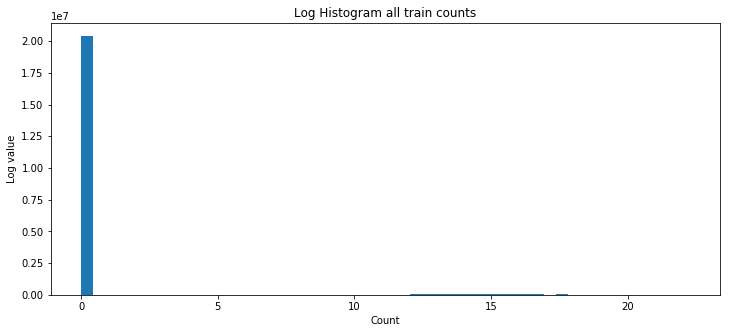

In [18]:
plt.figure(figsize=(12, 5))
plt.hist(np.log(train[columns_to_use].values.flatten()+1), bins=50)
plt.title('Log Histogram all train counts')
plt.xlabel('Count')
plt.ylabel('Log value')
plt.show()

Both values of distribution and log distribution are heavily concentrated around 0

## <a id='4.4'>4.4 '0' sparse:</a>

In [20]:
((train[columns_to_use].values.flatten())==0).mean()

0.9668404823200849

In [21]:
((test[columns_to_use].values.flatten())==0).mean()

0.9854387220510407

**97% - 99% values of train and test data are zeros**

## <a id='5'>5 Baseline:</a>

In [26]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb


## <a id='5.1'>5.1 LighGBM regression:</a>

In [23]:
y = np.log(1+train.target.values)

In [27]:
train = lgb.Dataset(train[columns_to_use],y ,feature_name = "auto")

In [28]:
params = {'boosting_type': 'gbdt', 
          'objective': 'regression', 
          'metric': 'rmse', 
          'learning_rate': 0.01, 
          'num_leaves': 100, 
          'feature_fraction': 0.4, 
          'bagging_fraction': 0.6, 
          'max_depth': 5, 
          'min_child_weight': 10}

clf = lgb.train(params,
        train,
        num_boost_round = 400,
        verbose_eval=True)

In [29]:
preds = clf.predict(test[columns_to_use])

In [30]:
sample_submission = pd.read_csv(path + "sample_submission.csv")
sample_submission.target = np.exp(preds)-1
sample_submission.to_csv('simple_lgbm_1.csv', index=False)
sample_submission.head()

,ID,target
0,000137c73,1.836319e+06
1,00021489f,1.836319e+06
2,0004d7953,2.061034e+06
3,00056a333,3.658886e+06
4,00056d8eb,1.836319e+06


The model should score around **1.53695** when submitted